In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings for better readability
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format)

In [2]:
def load_battery_data(filepath):
    """
    Load battery dataset CSV file.
    """
    df = pd.read_csv(filepath, parse_dates=["start_time"])
    return df

In [3]:
dataset_path = './battery_alt_dataset/regular_alt_batteries'

battery_files = [f for f in os.listdir(dataset_path) if f.endswith('.csv')]
print(f"Found {len(battery_files)} battery files.")

Found 15 battery files.


In [4]:
sample_file = os.path.join(dataset_path, battery_files[0])
df = load_battery_data(sample_file)

# Display first few rows
df.head()

,start_time,time,mode,voltage_charger,temperature_battery,voltage_load,current_load,temperature_mosfet,temperature_resistor,mission_type
0,2022-07-19 11:10:00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN
1,2022-07-19 11:10:00,1.89,0.00,8.34,23.06,NaN,NaN,NaN,NaN,NaN
2,2022-07-19 11:10:00,2.81,0.00,8.34,23.06,NaN,NaN,NaN,NaN,NaN
3,2022-07-19 11:10:00,3.73,0.00,8.34,23.06,NaN,NaN,NaN,NaN,NaN
4,2022-07-19 11:10:00,4.65,0.00,8.34,23.06,NaN,NaN,NaN,NaN,NaN


In [5]:
# Shape of the dataset (rows, columns)
print(f"Dataset Shape: {df.shape}")

Dataset Shape: (1101244, 10)


In [6]:
# Column names and data types
print("\nDataset Info:")
df.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1101244 entries, 0 to 1101243
Data columns (total 10 columns):
 #   Column                Non-Null Count    Dtype         
---  ------                --------------    -----         
 0   start_time            1101244 non-null  datetime64[ns]
 1   time                  1101244 non-null  float64       
 2   mode                  1101244 non-null  float64       
 3   voltage_charger       1101244 non-null  float64       
 4   temperature_battery   1101244 non-null  float64       
 5   voltage_load          106006 non-null   float64       
 6   current_load          106006 non-null   float64       
 7   temperature_mosfet    106006 non-null   float64       
 8   temperature_resistor  106006 non-null   float64       
 9   mission_type          106006 non-null   float64       
dtypes: datetime64[ns](1), float64(9)
memory usage: 84.0 MB


In [46]:
# Summary statistics of numerical columns
print("\nSummary Statistics:")
df.describe().T


Summary Statistics:


,count,mean,min,25%,50%,75%,max,std
start_time,1101244,2022-07-31 13:54:03.078336768,2022-07-19 11:10:00,2022-07-26 22:45:00,2022-07-31 11:11:00,2022-08-04 19:39:00,2022-08-09 13:31:00,NaN
time,1101244.00,538453.01,0.00,269161.22,537120.29,808046.33,1079483.15,311331.08
mode,1101244.00,0.36,-1.00,0.00,0.00,1.00,1.00,0.65
voltage_charger,1101244.00,7.47,-0.06,6.94,7.76,8.23,9.18,1.03
temperature_battery,1101244.00,36.77,0.00,25.23,32.42,39.14,102.31,16.42
voltage_load,106006.00,6.51,-0.03,6.07,6.45,6.88,8.70,0.71
current_load,106006.00,12.80,0.15,2.52,16.53,16.85,19.39,6.33
temperature_mosfet,106006.00,29.45,18.22,25.19,31.06,31.94,33.46,3.17
temperature_resistor,106006.00,28.69,22.01,23.14,31.04,31.70,35.16,3.88
mission_type,106006.00,0.73,0.00,0.00,1.00,1.00,1.00,0.44


In [47]:
# Count of missing values per column
print("\nMissing Values Count:")
print(df.isnull().sum())

# Percentage of missing values
missing_percent = df.isnull().sum() * 100 / len(df)
print("\nMissing Values Percentage:")
print(missing_percent[missing_percent > 0])


Missing Values Count:
start_time                   0
time                         0
mode                         0
voltage_charger              0
temperature_battery          0
voltage_load            995238
current_load            995238
temperature_mosfet      995238
temperature_resistor    995238
mission_type            995238
dtype: int64

Missing Values Percentage:
voltage_load           90.37
current_load           90.37
temperature_mosfet     90.37
temperature_resistor   90.37
mission_type           90.37
dtype: float64


In [48]:
# Count duplicate rows
print(f"\nDuplicate Rows: {df.duplicated().sum()}")

# Dropping duplicates if necessary
df = df.drop_duplicates()


Duplicate Rows: 0


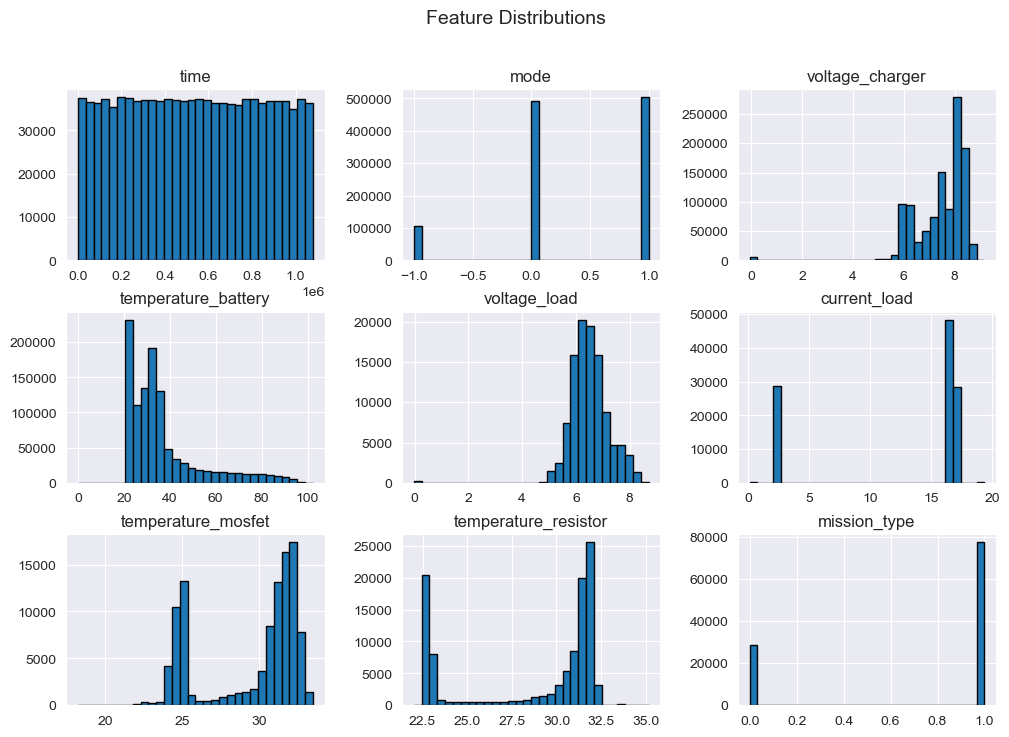

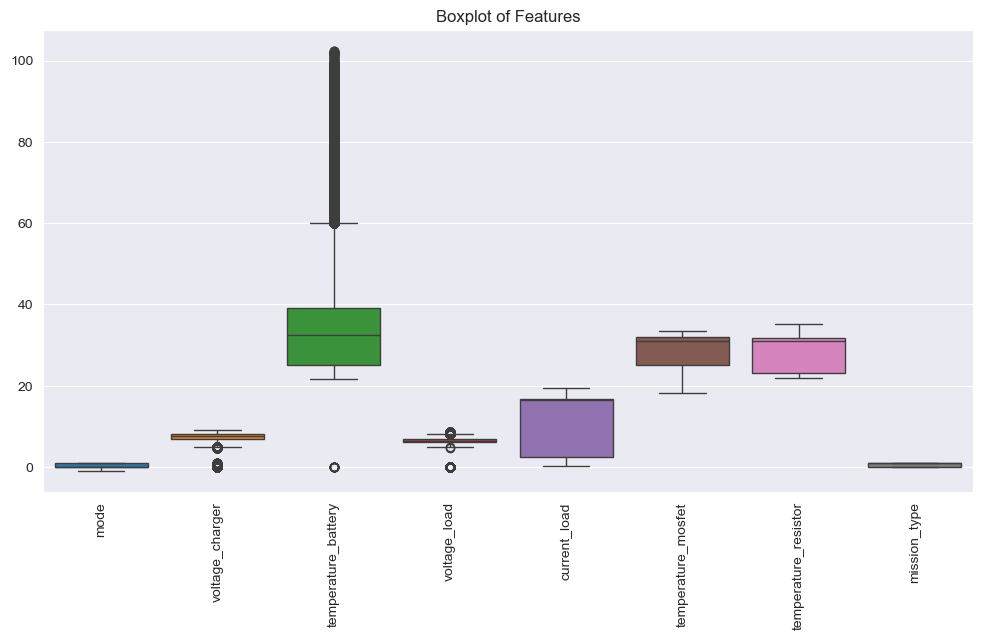

In [51]:
timeless_df = df.drop(columns=["start_time", "time"])
# Histogram for numerical columns
timeless_df.hist(figsize=(12, 8), bins=30, edgecolor="black")
plt.suptitle("Feature Distributions", fontsize=14)
plt.show()

# Boxplot for detecting outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.drop(columns=["start_time", "time"]))
plt.xticks(rotation=90)
plt.title("Boxplot of Features")
plt.show()

In [52]:
df.nunique()


start_time                   17
time                    1101244
mode                          3
voltage_charger            5034
temperature_battery       12489
voltage_load               4118
current_load              16194
temperature_mosfet         1233
temperature_resistor       1218
mission_type                  2
dtype: int64